In [4]:
# -------------------------------
# LAB TASK 1: Next Word Prediction
# -------------------------------

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# -------------------------------
# 1) Load larger Shakespeare text
# -------------------------------
text = """
To be, or not to be, that is the question:
Whether 'tis nobler in the mind to suffer
The slings and arrows of outrageous fortune,
Or to take arms against a sea of troubles
And by opposing end them. To die—to sleep,
No more; and by a sleep to say we end
The heart-ache and the thousand natural shocks
That flesh is heir to: 'tis a consummation
Devoutly to be wish'd. To die, to sleep;
To sleep, perchance to dream—ay, there's the rub:
For in that sleep of death what dreams may come,
When we have shuffled off this mortal coil,
Must give us pause—there's the respect
That makes calamity of so long life.
"""

# Clean text: lowercase, remove punctuation
text = text.lower().replace("\n", " ").replace(",", "").replace(":", "").replace("'", "").replace("—"," ")
words = text.split()
print("Total words in text:", len(words))

# -------------------------------
# 2) Tokenize text
# -------------------------------
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1
print("Vocabulary size:", total_words)

# -------------------------------
# 3) Create sequences (previous 3 words -> next word)
# -------------------------------
n_gram = 4  # 3 input + 1 output
input_sequences = []

for i in range(n_gram, len(words)+1):
    seq = words[i-n_gram:i]
    token_list = tokenizer.texts_to_sequences([seq])[0]
    if len(token_list) != n_gram:
        continue
    input_sequences.append(token_list)

input_sequences = np.array(input_sequences)
X = input_sequences[:, :-1]
y = input_sequences[:, -1]

# One-hot encode y
y = keras.utils.to_categorical(y, num_classes=total_words)

print("Number of sequences:", X.shape[0])
print("X shape:", X.shape)
print("y shape:", y.shape)

# -------------------------------
# 4) Build RNN Model
# -------------------------------
model = keras.Sequential([
    keras.layers.Embedding(input_dim=total_words, output_dim=10, input_length=X.shape[1]),
    keras.layers.SimpleRNN(50, activation='relu'),
    keras.layers.Dense(total_words, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# -------------------------------
# 5) Train Model
# -------------------------------
history = model.fit(X, y, epochs=300, verbose=1)

# -------------------------------
# 6) Predict next word
# -------------------------------
def predict_next_word(model, tokenizer, text_seq, n_words=1):
    for _ in range(n_words):
        token_list = tokenizer.texts_to_sequences([text_seq])[0]
        if len(token_list) == 0:
            token_list = [0]
        token_list = pad_sequences([token_list], maxlen=X.shape[1], padding='pre')
        predicted = model.predict(token_list, verbose=0)
        predicted_index = np.argmax(predicted, axis=-1)[0]
        output_word = ''
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break
        text_seq += " " + output_word
    return text_seq

# -------------------------------
# 7) Test the model
# -------------------------------
seed_text = "to be or"
predicted_text = predict_next_word(model, tokenizer, seed_text, n_words=5)
print("\nSeed text:", seed_text)
print("Predicted text:", predicted_text)

# -------------------------------
# 8) Optional: Save model
# -------------------------------
model.save("shakespeare_rnn_model.h5")
print("\nModel saved as 'shakespeare_rnn_model.h5'")


Total words in text: 117
Vocabulary size: 75
Number of sequences: 93
X shape: (93, 3)
y shape: (93, 75)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0371 - loss: 4.3166
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0752 - loss: 4.3092
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0845 - loss: 4.3015
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0572 - loss: 4.2982
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0767 - loss: 4.2894
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0728 - loss: 4.2824
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1040 - loss: 4.2708
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0650 - loss: 4.2624
Epoch 9/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0767 - loss: 4.2525
Epoch 10/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0689 - loss: 4.2406
Epoch 11/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0884 - loss: 4.2244
Epoch 12/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0923 - lo


Seed text: to be or
Predicted text: to be or not to be that is

Model saved as 'shakespeare_rnn_model.h5'


/tmp/ipython-input-2589907208.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2015-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed


Price           Close
Ticker           GOOG
Date                 
2015-01-02  25.990791
2015-01-05  25.448999
2015-01-06  24.859165
2015-01-07  24.816574
2015-01-08  24.894823


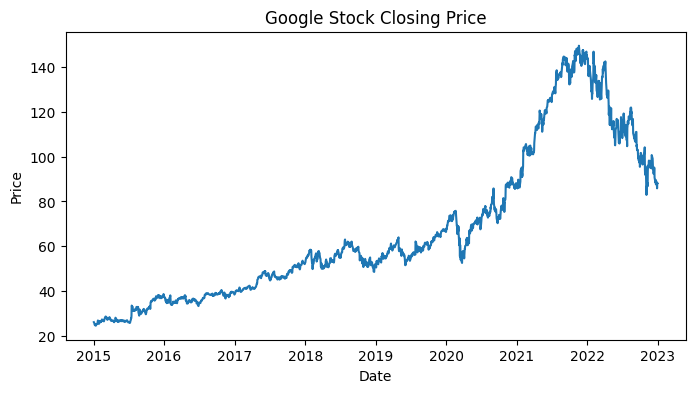

X shape: (1954, 60, 1)
y shape: (1954,)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 60, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,701 (30.08 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0832 - val_loss: 0.0460
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0010 - val_loss: 0.0321
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 3.9797e-04 - val_loss: 0.0229
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.2723e-04 - val_loss: 0.0193
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.4058e-04 - val_loss: 0.0176
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.7859e-04 - val_loss: 0.0179
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.3680e-04 - val_loss: 0.0137
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.5284e-04 - val_loss: 0.0151
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.3430e-04 - val_loss: 0.0134
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.1486e-04 - val_loss: 0.0124
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 2.3630e-04 - val_loss: 0.0100
Epoch 12/50
44/44 ━━━━━━━━━

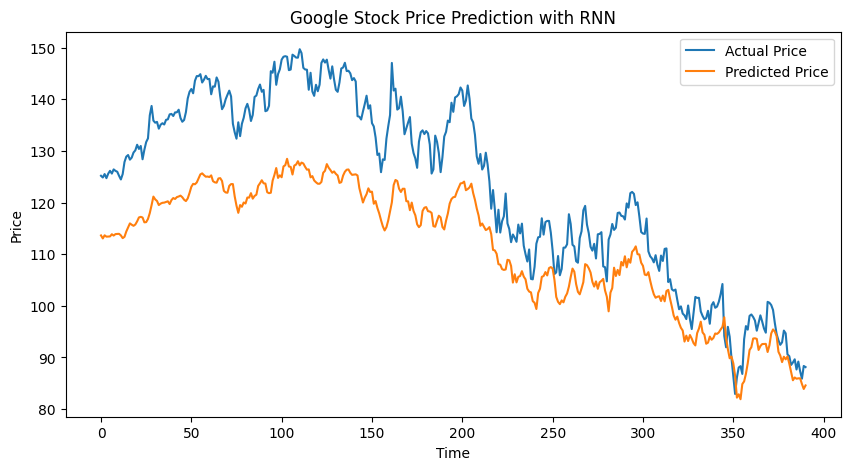

Model saved as 'goog_stock_rnn.h5' and scaler as 'goog_stock_scaler.save'


In [2]:
# -------------------------------
# LAB TASK 2: Stock Price Prediction
# -------------------------------

!pip install -q yfinance matplotlib pandas tensorflow scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras

# -------------------------------
# 1) Load Google Stock Price Data
# -------------------------------
# Using Yahoo Finance
ticker = "GOOG"
df = yf.download(ticker, start="2015-01-01", end="2023-01-01")
df = df[['Close']]
print(df.head())

# Plot closing price
plt.figure(figsize=(8,4))
plt.plot(df['Close'])
plt.title('Google Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# -------------------------------
# 2) Normalize Values
# -------------------------------
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df.values)

# -------------------------------
# 3) Prepare Time-Step Sequences
# -------------------------------
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i,0])
    return np.array(X), np.array(y)

time_steps = 60
X, y = create_sequences(scaled_data, time_steps)
X = X.reshape(X.shape[0], X.shape[1], 1)  # 3D shape for RNN [samples, timesteps, features]

print("X shape:", X.shape)
print("y shape:", y.shape)

# -------------------------------
# 4) Train/Test Split
# -------------------------------
train_size = int(0.8 * X.shape[0])
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# -------------------------------
# 5) Build RNN Model
# -------------------------------
model = keras.Sequential([
    keras.layers.SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    keras.layers.SimpleRNN(50),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# -------------------------------
# 6) Train Model
# -------------------------------
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# -------------------------------
# 7) Predict and Inverse Scale
# -------------------------------
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1,1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))

# -------------------------------
# 8) Plot Predictions vs Actual Prices
# -------------------------------
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title('Google Stock Price Prediction with RNN')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# -------------------------------
# 9) Optional: Save Model
# -------------------------------
model.save('goog_stock_rnn.h5')
import joblib
joblib.dump(scaler, 'goog_stock_scaler.save')

print("Model saved as 'goog_stock_rnn.h5' and scaler as 'goog_stock_scaler.save'")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 25000
Test samples: 25000
Shape of X_train_pad: (25000, 200)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.5770 - loss: 0.6562 - val_accuracy: 0.7648 - val_loss: 0.4923
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 23s 67ms/step - accuracy: 0.8262 - loss: 0.3941 - val_accuracy: 0.6572 - val_loss: 0.6245
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 24s 69ms/step - accuracy: 0.7348 - loss: 0.5470 - val_accuracy: 0.7696 - val_loss: 0.4832
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - accuracy: 0.8469 - loss: 0.3538 - val_accuracy: 0.8052 - val_loss: 0.4386
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 40s 66ms/step - accuracy: 0.8800 - loss: 0.2901 - val_accuracy: 0.8168 - val_loss: 0.4338

Test Accuracy: 81.87% | Loss: 0.4431


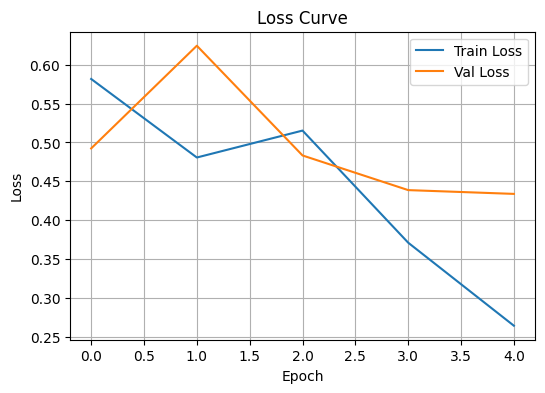

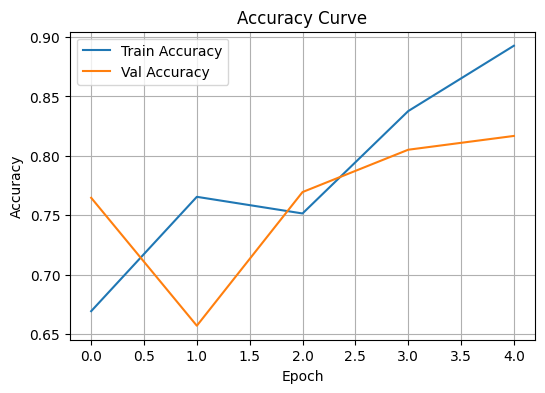

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step



Sample review: 'The movie was fantastic and had a great story'
Predicted sentiment score: 0.9198
Predicted sentiment: Positive

Model saved as imdb_rnn_model.h5


In [3]:
# -------------------------------
# LAB TASK 3: Sentiment Analysis
# -------------------------------

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt

# -------------------------------
# 1) Load IMDb Dataset
# -------------------------------
# Limit vocabulary size for simplicity
vocab_size = 10000
max_len = 200  # max words per review

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

print("Training samples:", len(X_train))
print("Test samples:", len(X_test))

# -------------------------------
# 2) Pad sequences
# -------------------------------
X_train_pad = pad_sequences(X_train, maxlen=max_len, padding='pre')
X_test_pad = pad_sequences(X_test, maxlen=max_len, padding='pre')

print("Shape of X_train_pad:", X_train_pad.shape)

# -------------------------------
# 3) Build RNN Model
# -------------------------------
model = keras.Sequential([
    keras.layers.Embedding(input_dim=vocab_size, output_dim=32, input_length=max_len),
    keras.layers.SimpleRNN(50, activation='tanh'),
    keras.layers.Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# -------------------------------
# 4) Train Model
# -------------------------------
history = model.fit(
    X_train_pad, y_train,
    validation_split=0.1,
    epochs=5,
    batch_size=64,
    verbose=1
)

# -------------------------------
# 5) Evaluate Model
# -------------------------------
loss, acc = model.evaluate(X_test_pad, y_test, verbose=0)
print(f"\nTest Accuracy: {acc*100:.2f}% | Loss: {loss:.4f}")

# -------------------------------
# 6) Plot Training Curves
# -------------------------------
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# 7) Test custom review prediction
# -------------------------------
# Get word index mapping
word_index = imdb.get_word_index()
index_word = {v+3:k for k,v in word_index.items()}  # +3 because of reserved indices
index_word[0] = '<PAD>'
index_word[1] = '<START>'
index_word[2] = '<UNK>'
index_word[3] = '<UNUSED>'

def encode_review(text):
    text = text.lower().split()
    encoded = [1]  # <START>
    for word in text:
        idx = word_index.get(word, 2)  # 2=<UNK>
        encoded.append(idx)
    return pad_sequences([encoded], maxlen=max_len, padding='pre')

sample_review = "The movie was fantastic and had a great story"
encoded_review = encode_review(sample_review)
pred = model.predict(encoded_review)[0][0]
print(f"\nSample review: '{sample_review}'")
print(f"Predicted sentiment score: {pred:.4f}")
print("Predicted sentiment:", "Positive" if pred>0.5 else "Negative")

# -------------------------------
# 8) Optional: Save model
# -------------------------------
model.save("imdb_rnn_model.h5")
print("\nModel saved as imdb_rnn_model.h5")


Dataset head:


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


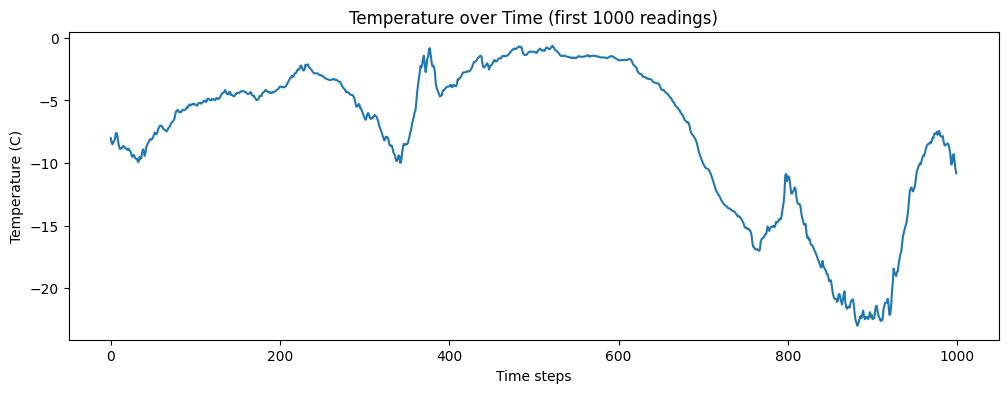

X shape: (420527, 24, 1) y shape: (420527,)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
4731/4731 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - loss: 0.0048 - val_loss: 3.6120e-05
Epoch 2/20
4731/4731 ━━━━━━━━━━━━━━━━━━━━ 34s 7ms/step - loss: 3.2130e-05 - val_loss: 1.3060e-05
Epoch 3/20
4731/4731 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - loss: 1.8223e-05 - val_loss: 1.0223e-05
Epoch 4/20
4731/4731 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - loss: 1.3886e-05 - val_loss: 9.6983e-06
Epoch 5/20
4731/4731 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - loss: 1.3795e-05 - val_loss: 9.7282e-06
Epoch 6/20
4731/4731 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - loss: 1.3151e-05 - val_loss: 1.0466e-05
Epoch 7/20
4731/4731 ━━━━━━━━━━━━━━━━━━━━ 34s 7ms/step - loss: 1.3185e-05 - val_loss: 9.3622e-06
Epoch 8/20
4731/4731 ━━━━━━━━━━━━━━━━━━━━ 39s 7ms/step - loss: 1.3193e-05 - val_loss: 9.5050e-06
Epoch 9/20
4731/4731 ━━━━━━━━━━━━━━━━━━━━ 32s 7ms/step - loss: 1.2886e-05 - val_loss: 1.1441e-05
Epoch 10/20
4731/4731 ━━━━━━━━━━━━━━━━━━━━ 32s 7ms/step - loss: 1.2730e-05 - val_loss: 9.8131e-06
Epoch 11/20
4731/4731 ━━━━━━━━━━━

2629/2629 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


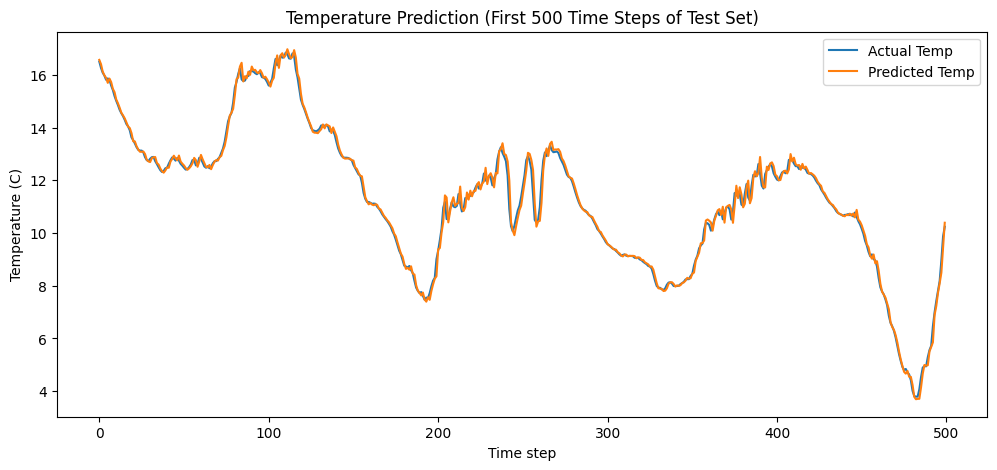


Model saved as 'jena_temp_rnn_model.h5' and scaler as 'jena_temp_scaler.save'


In [5]:
# -------------------------------
# LAB TASK 4: Weather Forecasting with RNN
# -------------------------------

!pip install -q tensorflow pandas matplotlib scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

# -------------------------------
# 1) Load Jena Climate Dataset
# -------------------------------
# Using TensorFlow example dataset
!wget -q https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip
!unzip -q jena_climate_2009_2016.csv.zip

df = pd.read_csv("jena_climate_2009_2016.csv")
print("Dataset head:")
display(df.head())

# We'll predict 'T (degC)' → Temperature in Celsius
temp = df['T (degC)'].values.reshape(-1,1)

# Plot temperature over time
plt.figure(figsize=(12,4))
plt.plot(temp[:1000])
plt.title("Temperature over Time (first 1000 readings)")
plt.xlabel("Time steps")
plt.ylabel("Temperature (C)")
plt.show()

# -------------------------------
# 2) Normalize Data
# -------------------------------
scaler = MinMaxScaler(feature_range=(0,1))
temp_scaled = scaler.fit_transform(temp)

# -------------------------------
# 3) Create sequences (past 24 hours → next hour)
# -------------------------------
def create_sequences(data, time_steps=24):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i,0])
    return np.array(X), np.array(y)

time_steps = 24
X, y = create_sequences(temp_scaled, time_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))  # 3D input for RNN
print("X shape:", X.shape, "y shape:", y.shape)

# -------------------------------
# 4) Train/Test Split
# -------------------------------
train_size = int(0.8 * X.shape[0])
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# -------------------------------
# 5) Build RNN Model
# -------------------------------
model = keras.Sequential([
    keras.layers.SimpleRNN(50, activation='tanh', input_shape=(time_steps,1)),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# -------------------------------
# 6) Train Model
# -------------------------------
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.1, verbose=1)

# -------------------------------
# 7) Predict and inverse scale
# -------------------------------
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))

# -------------------------------
# 8) Plot Actual vs Predicted Temperature
# -------------------------------
plt.figure(figsize=(12,5))
plt.plot(y_test_inv[:500], label="Actual Temp")
plt.plot(y_pred_inv[:500], label="Predicted Temp")
plt.title("Temperature Prediction (First 500 Time Steps of Test Set)")
plt.xlabel("Time step")
plt.ylabel("Temperature (C)")
plt.legend()
plt.show()

# -------------------------------
# 9) Optional: Save Model
# -------------------------------
model.save("jena_temp_rnn_model.h5")
import joblib
joblib.dump(scaler, "jena_temp_scaler.save")
print("\nModel saved as 'jena_temp_rnn_model.h5' and scaler as 'jena_temp_scaler.save'")


In [9]:

# -------------------------------
# LAB TASK 5: Music Note Generation (Fixed)
# -------------------------------

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
from music21 import stream, note, chord

# -------------------------------
# 1) Example small melody dataset
# -------------------------------
# Predefined notes/chords
notes = [
    'C4','D4','E4','F4','G4','A4','B4','C5',
    'C4','E4','G4','C5','B4','A4','G4','F4'
]

# -------------------------------
# 2) Prepare sequences
# -------------------------------
note_names = sorted(set(notes))
note_to_int = {n:i for i,n in enumerate(note_names)}
int_to_note = {i:n for i,n in enumerate(note_names)}

sequence_length = 4  # small sequence
network_input = []
network_output = []

for i in range(len(notes)-sequence_length):
    seq_in = notes[i:i+sequence_length]
    seq_out = notes[i+sequence_length]
    network_input.append([note_to_int[n] for n in seq_in])
    network_output.append(note_to_int[seq_out])

network_input = np.array(network_input)
network_output = np.array(network_output)
vocab_size = len(note_names)
print("Vocabulary size:", vocab_size)

# -------------------------------
# 3) Build RNN Model
# -------------------------------
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=10, input_length=sequence_length))
model.add(SimpleRNN(50, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# -------------------------------
# 4) Train Model
# -------------------------------
model.fit(network_input, network_output, epochs=200, verbose=1)

# -------------------------------
# 5) Generate new sequence
# -------------------------------
def generate_notes(model, seed_seq, int_to_note, n_notes=10):
    generated = list(seed_seq)
    for _ in range(n_notes):
        input_seq = np.array([generated[-sequence_length:]])
        prediction = model.predict(input_seq, verbose=0)
        index = np.argmax(prediction)
        generated.append(index)
    return [int_to_note[i] for i in generated]

# Choose a seed sequence
seed_seq = network_input[0]
generated_notes = generate_notes(model, seed_seq, int_to_note, n_notes=10)
print("Generated note sequence:")
print(generated_notes)

# -------------------------------
# 6) Convert generated notes to MIDI
# -------------------------------
output_notes = []
for pattern in generated_notes:
    output_notes.append(note.Note(pattern))

midi_stream = stream.Stream(output_notes)
midi_stream.write('midi', fp='generated_music_fixed.mid')
print("\nGenerated MIDI saved as 'generated_music_fixed.mid'")



Vocabulary size: 8


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2500 - loss: 2.0664
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2500 - loss: 2.0597
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4167 - loss: 2.0534
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4167 - loss: 2.0474
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4167 - loss: 2.0414
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.4167 - loss: 2.0352
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4167 - loss: 2.0289
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4167 - loss: 2.0224
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4167 - loss: 2.0160
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4167 - loss: 2.0095
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5000 - loss: 2.0026
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.5833 - los